In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [25]:
import pandas as pd
a=pd.read_csv('Crime_Data.csv',low_memory=False)
a

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815877,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
815878,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
815879,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
815880,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


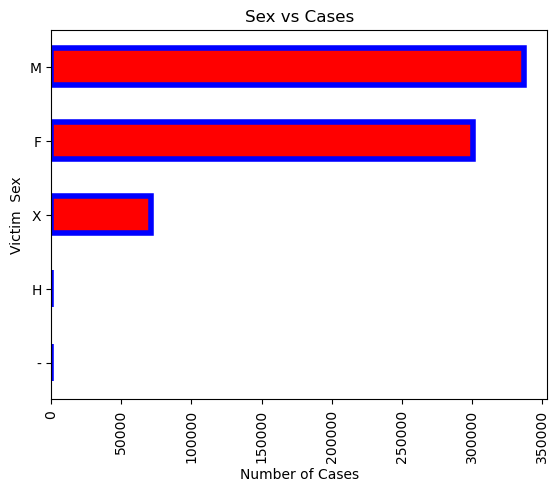

In [29]:
vic_sex= a['Vict Sex'].value_counts().sort_values(ascending=False).head(20)
Vict_sex = vic_sex.head(20)
Vict_sex = Vict_sex.iloc[::-1]

Vict_sex.plot(kind='barh', color='red',edgecolor='blue',
       linewidth=4)

plt.xlabel('Number of Cases')
plt.ylabel('Victim  Sex')
plt.title('Sex vs Cases')
plt.xticks(rotation=90) 


plt.show()

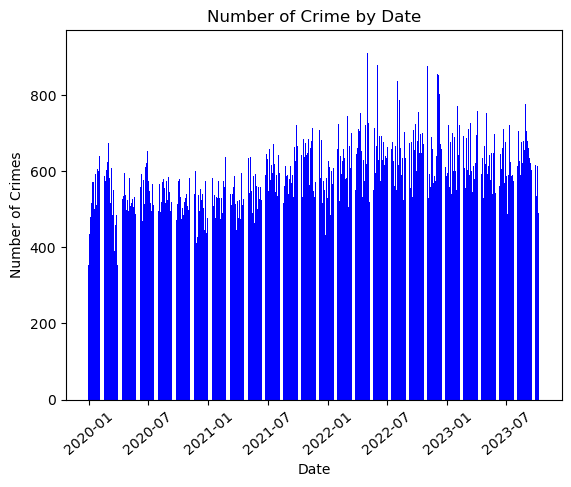

In [13]:
a['Date Rptd'] = pd.to_datetime(a['Date Rptd']) 
daily_counts = a['Date Rptd'].value_counts().sort_index()


plt.bar(daily_counts.index, daily_counts.values, color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Number of Crime by Date')
plt.xticks(rotation=40)  


plt.show()

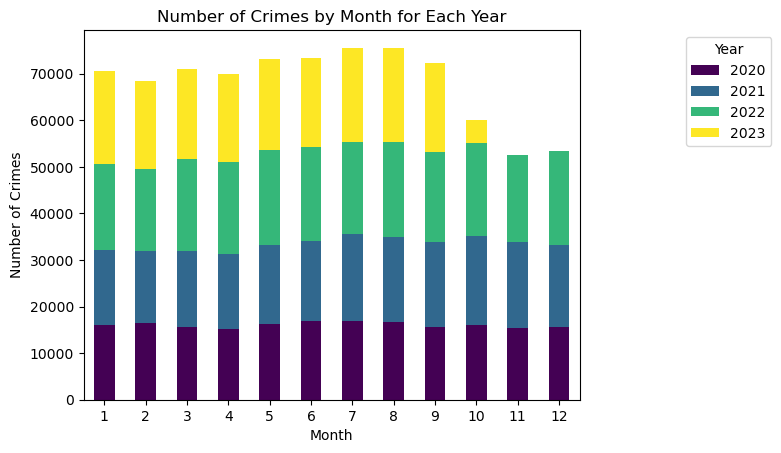

In [41]:
a['Date Rptd'] = pd.to_datetime(a['Date Rptd'])

a['Month'] = a['Date Rptd'].dt.month
a['Year'] = a['Date Rptd'].dt.year

monthly_counts = a.groupby(['Year', 'Month']).size().reset_index(name='Count')

pivot_table = monthly_counts.pivot(index='Month', columns='Year', values='Count')

pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Month for Each Year')
plt.xticks(rotation=0)  
plt.legend(title='Year', bbox_to_anchor=(1.2, 1), loc='upper left')
plt.show()


In [26]:
a['Vict Sex']

0         F
1         M
2         X
3         F
4         X
         ..
815877    M
815878    F
815879    M
815880    F
815881    F
Name: Vict Sex, Length: 815882, dtype: object

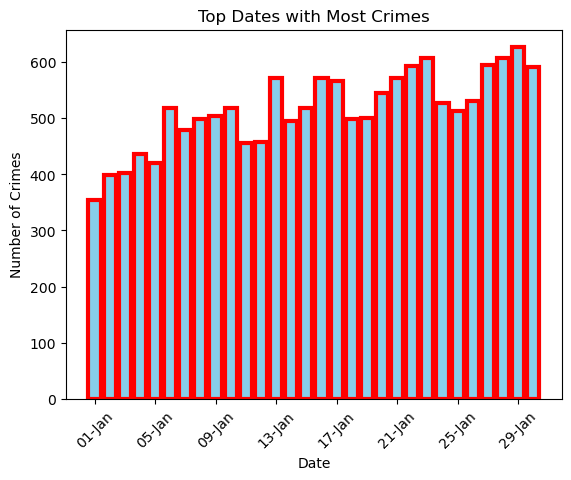

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

a['Date Rptd'] = pd.to_datetime(a['Date Rptd']) 

daily_counts = a['Date Rptd'].value_counts().sort_values(ascending=False).sort_index()

top_ten_dates = daily_counts.head(30)



plt.bar(top_ten_dates.index, top_ten_dates.values, color='skyblue',edgecolor='red',
       linewidth=3)

date_format = DateFormatter("%d-%b")
plt.gca().xaxis.set_major_formatter(date_format)
#top_ten_dates.plot(kind='barh', color='red',edgecolor='blue',
#       linewidth=4)

plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Top Dates with Most Crimes')
plt.xticks(rotation=45) 

plt.show()

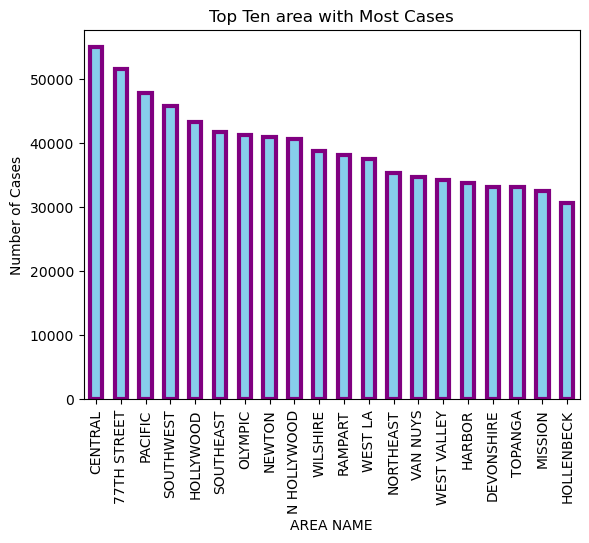

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


a['AREA NAME'] = a['AREA NAME'].str.upper() 

location_counts = a['AREA NAME'].value_counts().sort_values(ascending=False).head(20)
top_ten_locations = location_counts.head(20)


top_ten_locations.plot(kind='bar', color='skyblue',edgecolor='purple',
       linewidth=3)

plt.xlabel('AREA NAME')
plt.ylabel('Number of Cases')
plt.title('Top Ten area with Most Cases')
plt.xticks(rotation=90) 


plt.show()

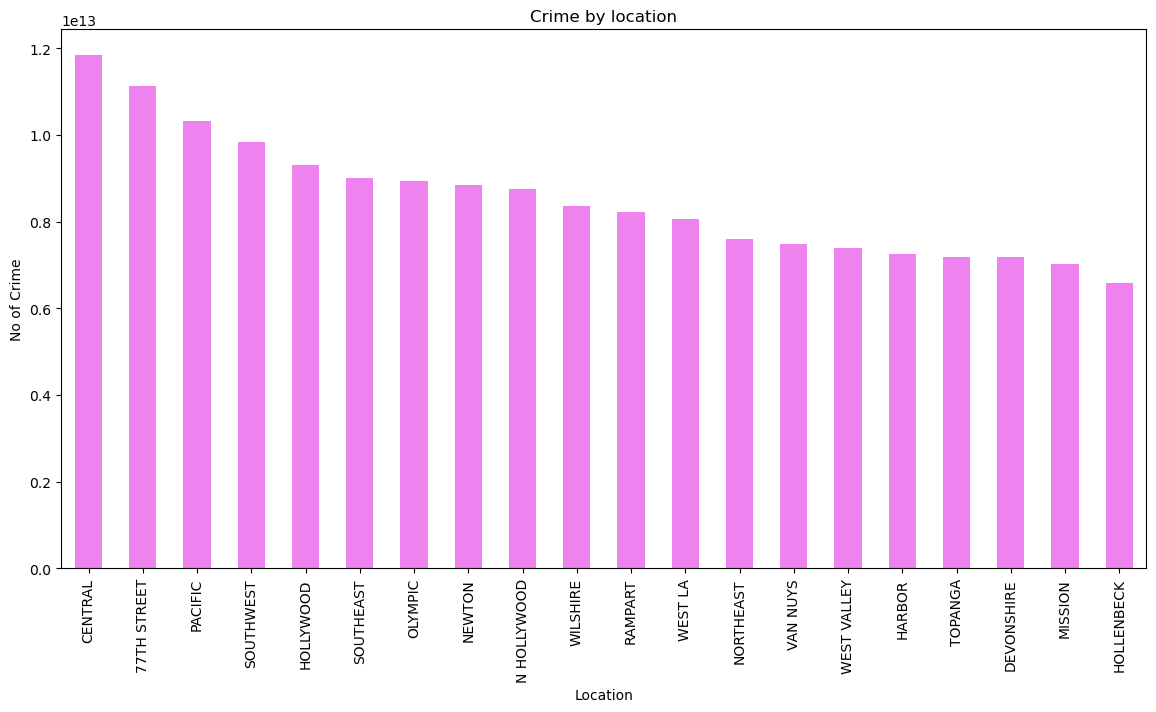

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

a['AREA NAME'] = a['AREA NAME'].str.upper()

mean_fine_by_desc = a.groupby('AREA NAME')['DR_NO'].sum().sort_values(ascending=False).head(20)

mean_fine_by_desc.plot(kind='bar', color='violet', figsize=(14, 7))  

plt.xlabel('Location')
plt.ylabel('No of Crime')
plt.title('Crime by location')
plt.xticks(rotation=90) 

plt.show()

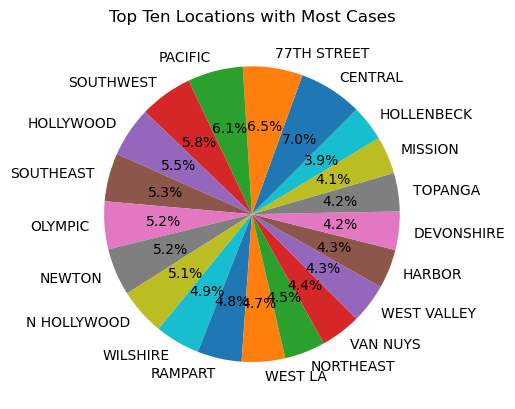

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

a['AREA NAME'] = a['AREA NAME'].str.upper() 

location_counts = a['AREA NAME'].value_counts().sort_values(ascending=False)

top_ten_locations = location_counts.head(20)
plt.pie(top_ten_locations, labels=top_ten_locations.index, autopct='%1.1f%%', startangle=45)

plt.title('Top Ten Locations with Most Cases')

plt.show()

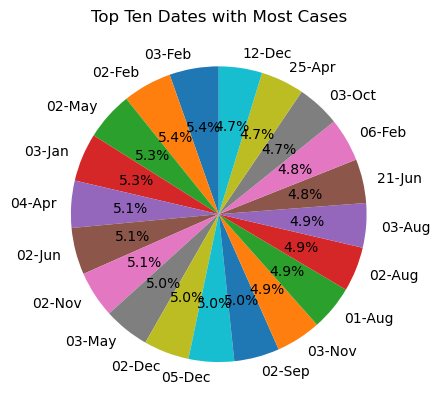

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

a['Date Rptd'] = pd.to_datetime(a['Date Rptd'])

daily_counts = a['Date Rptd'].value_counts().sort_values(ascending=False)

top_ten_dates = daily_counts.nlargest(20)

day_month_labels = top_ten_dates.index.strftime('%d-%b')

plt.pie(top_ten_dates, labels=day_month_labels, autopct='%1.1f%%', startangle=90)

plt.title('Top Ten Dates with Most Cases')

plt.show()

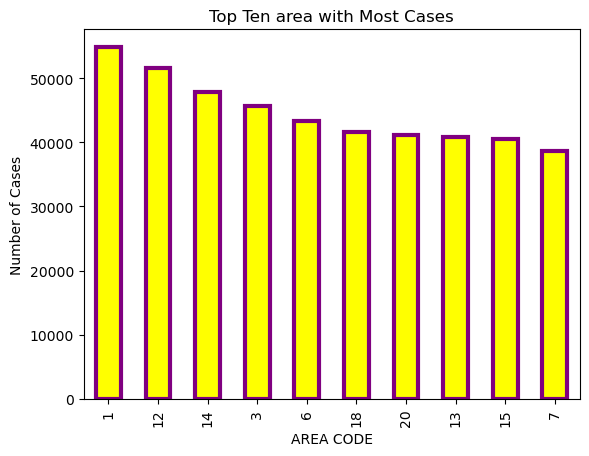

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

 

location_counts = a['AREA'].value_counts().sort_values(ascending=False).head(20)
top_ten_locations = location_counts.head(10)


top_ten_locations.plot(kind='bar', color='yellow',edgecolor='purple',
       linewidth=3)

plt.xlabel('AREA CODE')
plt.ylabel('Number of Cases')
plt.title('Top Ten area with Most Cases')
plt.xticks(rotation=90) 


plt.show()

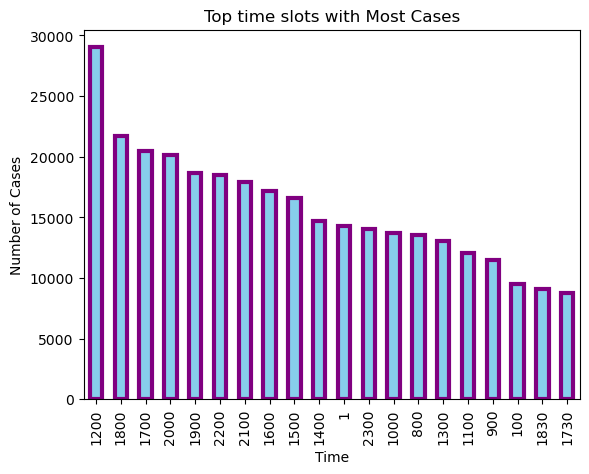

In [9]:
import pandas as pd
import matplotlib.pyplot as plt



time_counts = a['TIME OCC'].value_counts().sort_values(ascending=False).head(20)
top_ten_time = time_counts.head(20)


top_ten_time.plot(kind='bar', color='skyblue',edgecolor='purple',
       linewidth=3)

plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.title('Top time slots with Most Cases')
plt.xticks(rotation=90) 


plt.show()

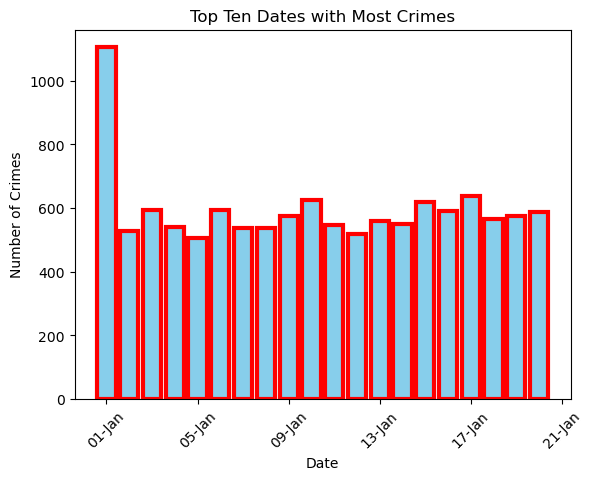

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

a['DATE OCC'] = pd.to_datetime(a['DATE OCC']) 

daily_counts = a['DATE OCC'].value_counts().sort_values(ascending=False).sort_index()

top_ten_dates = daily_counts.head(20)

plt.bar(top_ten_dates.index, top_ten_dates.values, color='skyblue',edgecolor='red',
       linewidth=3)

date_format = DateFormatter("%d-%b")
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.title('Top Ten Dates with Most Crimes')
plt.xticks(rotation=45) 

plt.show()

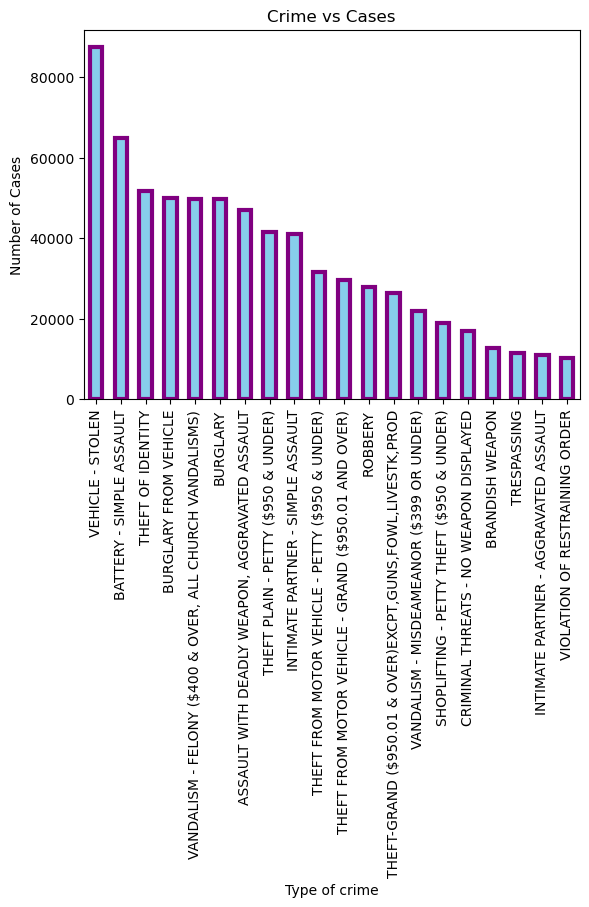

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


a['Crm Cd Desc'] = a['Crm Cd Desc'].str.upper() 

location_counts = a['Crm Cd Desc'].value_counts().sort_values(ascending=False).head(20)
top_ten_locations = location_counts.head(20)


top_ten_locations.plot(kind='bar', color='skyblue',edgecolor='purple',
       linewidth=3)

plt.xlabel('Type of crime')
plt.ylabel('Number of Cases')
plt.title('Crime vs Cases')
plt.xticks(rotation=90) 


plt.show()

In [12]:
import sys
sys.version_info

sys.version_info(major=3, minor=11, micro=3, releaselevel='final', serial=0)

In [13]:
a['Year'] = a['Date Rptd'].dt.year
cases = a.groupby('Year').size()
E_c = cases.mean()

print(f"The average number of cases per year is: {E_c}")


The average number of cases per year is: 203970.5


In [14]:
a['Year'] = a['Date Rptd'].dt.year
a['month']=a['Date Rptd'].dt.month
cases = a.groupby(['Year','month']).size()

E_c = cases.mean()
print(cases.to_dict())



{(2020, 1): 16060, (2020, 2): 16490, (2020, 3): 15539, (2020, 4): 15178, (2020, 5): 16331, (2020, 6): 16955, (2020, 7): 16906, (2020, 8): 16604, (2020, 9): 15636, (2020, 10): 16142, (2020, 11): 15342, (2020, 12): 15520, (2021, 1): 16154, (2021, 2): 15411, (2021, 3): 16306, (2021, 4): 16015, (2021, 5): 16785, (2021, 6): 17124, (2021, 7): 18742, (2021, 8): 18286, (2021, 9): 18257, (2021, 10): 18952, (2021, 11): 18483, (2021, 12): 17768, (2022, 1): 18397, (2022, 2): 17710, (2022, 3): 19802, (2022, 4): 19769, (2022, 5): 20597, (2022, 6): 20263, (2022, 7): 19756, (2022, 8): 20439, (2022, 9): 19357, (2022, 10): 20102, (2022, 11): 18778, (2022, 12): 20098, (2023, 1): 20058, (2023, 2): 18759, (2023, 3): 19367, (2023, 4): 19016, (2023, 5): 19411, (2023, 6): 18933, (2023, 7): 20050, (2023, 8): 20237, (2023, 9): 19134, (2023, 10): 4863}


In [15]:
a['Year'] = a['Date Rptd'].dt.year
cases = a.groupby('Year').size()
cases_new=cases.to_dict()

E_c = cases.mean()

print(cases_new)

l=list(cases_new.values())
k=list(cases_new.keys())
c=[]
for i in l:
    c.append(i//12)
print(c)


{2020: 192703, 2021: 208283, 2022: 235068, 2023: 179828}
[16058, 17356, 19589, 14985]


In [16]:
#To find the probability that a year has more than x cases using Markov's Inequality
#P(a>=X)<=E(x)/X, where a is the cases, X is the number of cases, E(x) is the expectation of X, that is mean.
X=21000
y=2021
t=k.index(y)
E=c[t]
P=(E/X)
print("By Markov's Inequality, ")
print(f"The probability of number of cases greater than {X} in a given month is less than or euqal to", P)

By Markov's Inequality, 
The probability of number of cases greater than 21000 in a given month is less than or euqal to 0.8264761904761905


In [17]:
#To find the probability that a month in a given year has more than x cases using Markov's Inequality
#P(a>=X)<=E(x)/X, where a is the cases, X is the number of cases, E(x) is the expectation of X, that is mean.

a['Year'] = a['Date Rptd'].dt.year
a['month']=a['Date Rptd'].dt.month
cases = a.groupby(['Year','month']).size()
cv=cases.to_dict()
r=list(cv.values())
s=sum(r)
s1=s//3
X=600000
y=2021
E=s1
P=(E/X)
print("By Markov's Inequality, ")
print(f"The probability of number of cases greater than {X} in a given year is less than or euqal to", P)

By Markov's Inequality, 
The probability of number of cases greater than 600000 in a given year is less than or euqal to 0.45326666666666665


In [18]:
a['Year'] = a['Date Rptd'].dt.year
a['Month'] = a['Date Rptd'].dt.month
cases_per_month_year = a.groupby(['Year', 'Month']).size()

variance = cases_per_month_year.groupby('Year').var()
variance_new=variance.to_dict()
l1=list(variance_new.values())
k1=list(variance_new.keys())



In [19]:
#To find the probability that a month in a given year has more than x cases using Chebyshev's Inequality
#P(a-E(x)>=X)<=V/X^2, where a is the cases, X is the number of cases, V is the variance of X.

X=21000-E
y=2021
t=k1.index(y)
V=l1[t]
P=(V/X**2)
print("By Chebyshev's Inequality, ")
print("The probability of number of cases greater than X in a given month is less than or euqal to", P)

By Chebyshev's Inequality, 
The probability of number of cases greater than X in a given month is less than or euqal to 2.3229618961404e-05


In [20]:
#To find the probability that a year has more than x cases using Chebyshev's Inequality
#P(a-E(x)>=X)<=V/X^2, where a is the cases, X is the number of cases, V is the variance of X.

X=300000-s1
y=2021
V=np.var(l)
print(V)
P=(V/X**2)
print("By Chebyshev's Inequality, ")
print("The probability of number of cases greater than X in a given year is less than or euqal to", P)

423867256.25
By Chebyshev's Inequality, 
The probability of number of cases greater than X in a given year is less than or euqal to 0.5391056085686639


In [21]:
#BAYES CONDITIONAL PROBABILITY
#P(C>X|MONTH=m1)= (P(MONTH=m1|C>X)*P(C>X))/P(MONTH=m1)
dic={'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}
X=18000
m1='JAN'
a['Year'] = a['Date Rptd'].dt.year
a['month']=a['Date Rptd'].dt.month
cases = a.groupby(['Year','month']).size()

E_c = cases.mean()

m=cases.to_dict()
d=list(m.values())
count=0
for i in d:
    if(i>X):
        count+=1
v=dic[m1]

g=0
for k,value in m.items():
    if(k[1]==6):
        if value>X:
            g+=1
  

P1=g/count
P2=count/48
P3=1/12

P=(P1*P2)/P3
print('BY BAYES CONDITIONAL PROBABILITY')
print(f"The probability of number of cases greater than {X} given month is {m1} is", P)




BY BAYES CONDITIONAL PROBABILITY
The probability of number of cases greater than 18000 given month is JAN is 0.5000000000000001
